In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

1. delta t vs t RK45
2. simple harmonic oscillator using
    - backward euler
    - forward euler
    - croma euler

# Spring Problem

From the equation `x'' = -k/m*x`; `x' = -Awcos(wt)` and `x(0) = x0`

With the same conditions, we'll vary the algorithm the `solve_ivp` function is using.

In [19]:
def spring(t,curr):
    x, v = curr
    return v, -k/m*x

k=0.1
m=5
x0 = 5
v0 = -1
initv = [x0,v0]

sol1 = solve_ivp(spring, [0, 1000], initv, method='RK45')

Visualizing the result

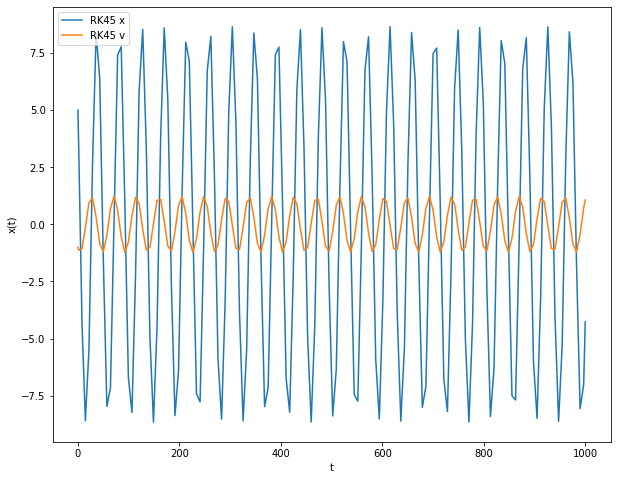

In [20]:
f = plt.figure(figsize=(10,8))
plt.plot(sol1.t,sol1.y[0], label='RK45 x')
plt.plot(sol1.t,sol1.y[1], label='RK45 v')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()

## For RK45

The total energy is given by E = PE + KE where:
- PE = 1/2 * kx^2
- KE = 1/2 * mx^2
E should be a constant and that value will be determined solely using initial PE and KE

In [21]:
def pe(x):
    return 1/2 * k*x**2
def ke(v):
    return 1/2 * m*v**2

def e(x,v):
    return pe(x) +ke(v)

# Calculating PE, and also total Evv
e1 = e(sol1.y[0], sol1.y[1])

# Calculating the exact total E
e1_0 = e(sol1.y[0][0], sol1.y[1][0])

print('Total Energy:',e1_0)
print('Average Total Energy from RK45:', np.average(e1))
print('Accuracy of this method:', np.average(abs(e1-e1_0))/e1_0)    # Accuracy is measured using

Total Energy: 3.75
Average Total Energy from RK45: 3.7502278226353956
Accuracy of this method: 8.82626162215645e-05


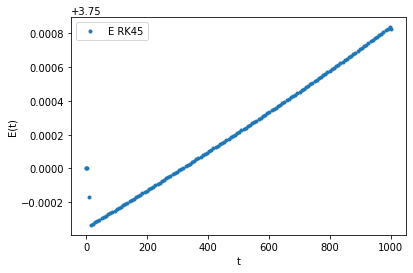

In [22]:
plt.plot(sol1.t, e1, '.',label='E RK45')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()

## Calcualting the dt for RK45

Using this method, substracting the current `t` by its next `t` will produce `dt`, done in a list gets a list of `dt`.

In [23]:
a = np.array([1,2,3,4,5,6])
change = a[1:]-a[:-1]
change

array([1, 1, 1, 1, 1])

Like so, 

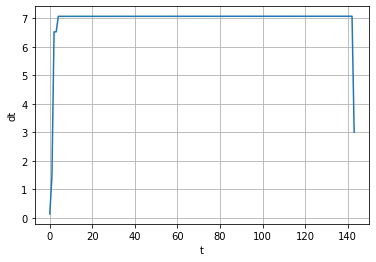

In [24]:
dt = sol1.t[1:]-sol1.t[:-1]
plt.plot(dt)
plt.xlabel('t')
plt.ylabel('dt')
plt.grid()
#plt.xlim(135, 144)
#plt.ylim(0, 4)

## Simple Harmonic Oscillator; Euler's Method

`x'' = -k/m*x` with solution known as `Acos(wt) + phi`

### With same initial conditions and constants

In [12]:
k=0.1
m=5
x0 = 5
v0 = 0

t0 = 0
T = 1000
N = 1000

h = (T-t0)/N
time = np.arange(t0, T+1, h)

def SHO(x,v):
    dvdt = -k/m*x
    dxdt = v
    return dxdt, dvdt

def SHO_solution(time):
    return 5*np.cos((k/m)*time)

SHOsol = SHO_solution(time)

### Forward Euler's Method

In [13]:
# Forward Euler's Method
x_list = [x0]
v_list = [v0]
for t in time:
    dxdt, dvdt = SHO(x_list[-1], v_list[-1])
    v_1 = v_list[-1] + h*dvdt
    x_1 = x_list[-1] + h*dxdt
    x_list.append(x_1)
    v_list.append(v_1)

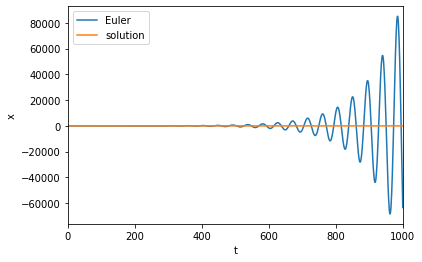

In [14]:
xlim0 = 0
xlim1 = 1000
plt.plot(time, x_list[:-1], label=('Euler'))
plt.plot(time, SHOsol, label=('solution'))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(xlim0,xlim1)
plt.legend()

### Backward Euler's Method

This implicit method requires some algebra to be done, so basically with each step, y_n+1 is calculated by (with SHO):
 `y_n+1 = y_n/(1+hk/m)`

In [15]:
# Backward Euler's Method
x_list = [x0]
for t in time:
    dxdt, dvdt = SHO(x_list[-1], v_list[-1])
    
    x_1 = (x_list[-1] + h*v_list[-1])/(1 + h**2*k/m)
    v_1 = v_list[-1] + h*(-k/m*x_1)
    
    x_list.append(x_1)
    v_list.append(v_1)

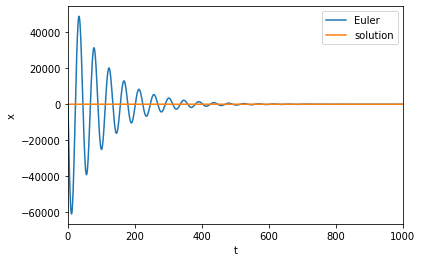

In [16]:
xlim0 = 0
xlim1 = 1000
plt.plot(time, x_list[:-1], label=('Euler'))
plt.plot(time, SHOsol, label=('solution'))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(xlim0,xlim1)
plt.legend()